## Linear Regression Project Tutorial

#### Predicting the medical insurance cost of a person

**Importar librerías y cargar dataframe**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [47]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

df = pd.read_csv(url)

**Ver las variables y una muestra de su contenido**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*Columns*

- *age:* age of primary beneficiary
- *sex:* insurance contractor gender, female or male
- *bmi:* Body mass index
- *children:* Number of children covered by health insurance / Number of dependents
- *smoker:* Smoking
- *region:* the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- *charges:* Individual medical costs billed by health insurance

In [49]:
df.sample(10)

age     sex     bmi  children smoker     region      charges
768    64  female  39.700         0     no  southwest  14319.03100
1278   39    male  29.925         1    yes  northeast  22462.04375
1244   18    male  33.330         0     no  southeast   1135.94070
41     31  female  36.630         2     no  southeast   4949.75870
865    40    male  29.900         2     no  southwest   6600.36100
1067   39    male  42.655         0     no  northeast   5757.41345
756    39  female  22.800         3     no  northeast   7985.81500
1207   36    male  33.400         2    yes  southwest  38415.47400
255    55  female  25.365         3     no  northeast  13047.33235
934    32    male  37.180         2     no  southeast   4673.39220

In [50]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

**Codificar las variables categóricas utilizando valores numéricos**

In [51]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [52]:
sex_dict = {'male':1, 'female':0}
df['sex'] = df['sex'].map(sex_dict)

In [53]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [54]:
smoker_dict = {'yes':1, 'no':0}
df['smoker'] = df['smoker'].map(smoker_dict)

In [55]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [56]:
region_dict = {'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}
df['region'] = df['region'].map(region_dict)

**Separar el dataframe en train y test**

In [57]:
X = df.drop(columns=['charges'])
y = df['charges']

In [58]:
X_train, X_test_aux, y_train, y_test_aux = train_test_split(X, y, test_size=0.3, random_state=19)

**EDA sobre el dataframe de entrenamiento**

In [59]:
df_train = pd.concat([X_train, y_train], axis=1)

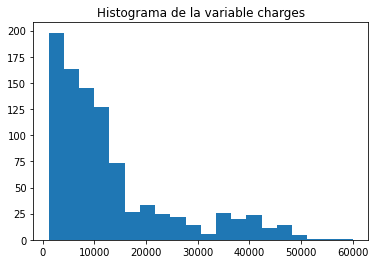

In [60]:
plt.hist(df_train['charges'], bins=20)
plt.title('Histograma de la variable charges')
plt.show()

In [61]:
fig = px.box(df_train, x='charges', title='Boxplot de la variable charges')
fig.show()

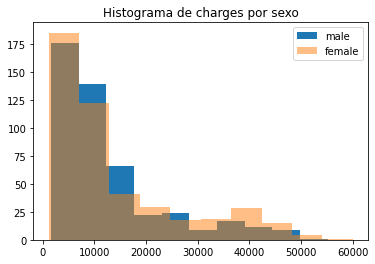

In [62]:
plt.hist(df_train[df_train['sex']==0]['charges'], label='male')
plt.hist(df_train[df_train['sex']==1]['charges'], label='female', alpha=0.5)
plt.title('Histograma de charges por sexo')
plt.legend()
plt.show()

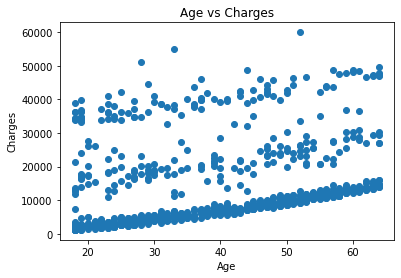

In [63]:
plt.plot(df_train['age'], df_train['charges'], 'o')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

Hay tres "franjas" de precios. Dentro de cada franja el precio aumenta con la edad.

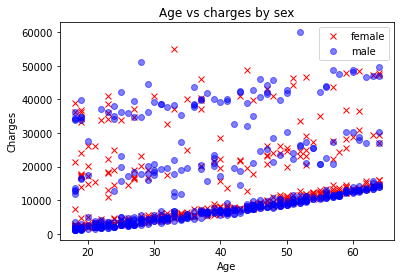

In [64]:
plt.plot(df_train['age'][df_train['sex']==0], df_train['charges'][df_train['sex']==0], 'rx', label='female')
plt.plot(df_train['age'][df_train['sex']==1], df_train['charges'][df_train['sex']==1], 'bo', alpha=0.5, label='male')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs charges by sex')
plt.legend()
plt.show()

En principio el sexo no parecería influir.

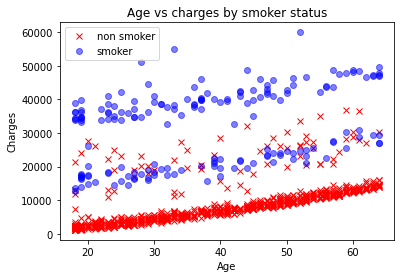

In [65]:
plt.plot(df_train['age'][df_train['smoker']==0], df_train['charges'][df_train['smoker']==0], 'rx', label='non smoker')
plt.plot(df_train['age'][df_train['smoker']==1], df_train['charges'][df_train['smoker']==1], 'bo', alpha=0.5, label='smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs charges by smoker status')
plt.legend()
plt.show()

Las personas que fuman (azul) no están en la primera franja (menor precio), solo en las dos más caras.

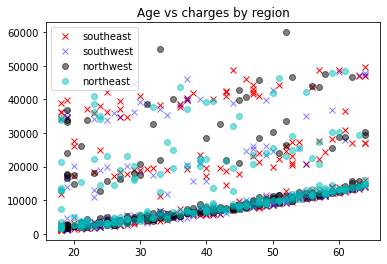

In [66]:
plt.plot(df_train['age'][df_train['region']==0], df_train['charges'][df_train['region']==0], 'rx', label='southeast')
plt.plot(df_train['age'][df_train['region']==1], df_train['charges'][df_train['region']==1], 'bx', alpha=0.5, label='southwest')
plt.plot(df_train['age'][df_train['region']==2], df_train['charges'][df_train['region']==2], 'ko', alpha=0.5, label='northwest')
plt.plot(df_train['age'][df_train['region']==3], df_train['charges'][df_train['region']==3], 'co', alpha=0.5, label='northeast')
plt.title('Age vs charges by region')
plt.legend()
plt.show()

La región no parecería influir en el precio.

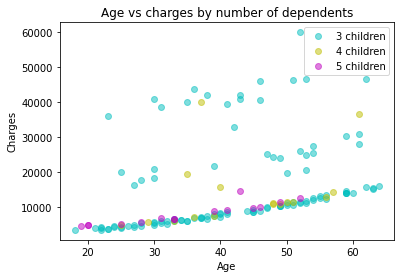

In [68]:
#plt.plot(df['age'][df['children']==0], df['charges'][df['children']==0], 'rx')
#plt.plot(df['age'][df['children']==1], df['charges'][df['children']==1], 'bx', alpha=0.5)
#plt.plot(df['age'][df['children']==2], df['charges'][df['children']==2], 'kx', alpha=0.5)
plt.plot(df_train['age'][df_train['children']==3], df_train['charges'][df_train['children']==3], 'co', alpha=0.5, label='3 children')
plt.plot(df_train['age'][df_train['children']==4], df_train['charges'][df_train['children']==4], 'yo', alpha=0.5, label = '4 children')
plt.plot(df_train['age'][df_train['children']==5], df_train['charges'][df_train['children']==5], 'mo', alpha=0.5, label = '5 children')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs charges by number of dependents')
plt.legend()
plt.show()

Las personas con 5 niños están en general en la primera franja.
Las personas con 4 niños están en general en la primera o segunda franja.

(Menor costo individual por varias personas aseguradas)

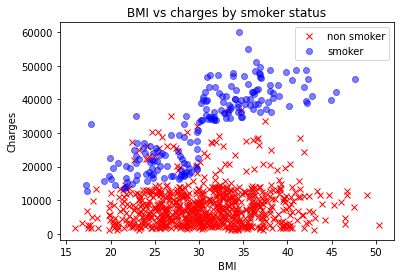

In [69]:
plt.plot(df_train['bmi'][df_train['smoker']==0], df_train['charges'][df_train['smoker']==0], 'rx', label='non smoker')
plt.plot(df_train['bmi'][df_train['smoker']==1], df_train['charges'][df_train['smoker']==1], 'bo', alpha=0.5, label='smoker')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs charges by smoker status')
plt.legend()
plt.show()

Los fumadores con BMI mayor a 30 (aproximadamente) tienen precios más altos que los fumadores con menor BMI.

**Análisis de correlación de las variables**

In [70]:
X_train.corr().style.background_gradient(cmap="Blues")

La correlación entre las variables es baja.

**Construcción y evaluación del modelo**

In [72]:
print(X_train.shape, y_train.shape)
print(X_test_aux.shape, y_test_aux.shape)

(936, 6) (936,)
(402, 6) (402,)


In [73]:
X_val, X_test, y_val, y_test = train_test_split(X_test_aux, y_test_aux, test_size=0.5, random_state=11)

In [74]:
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(201, 6) (201,)
(201, 6) (201,)


In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [76]:
y_train_pred = lin_reg.predict(X_train)
y_val_pred = lin_reg.predict(X_val)
y_test_pred = lin_reg.predict(X_test)

In [77]:
RMSE_train = mean_squared_error(y_train, y_train_pred, squared=False)
RMSE_val = mean_squared_error(y_val, y_val_pred, squared=False)
RMSE_test = mean_squared_error(y_test, y_test_pred, squared=False)

In [78]:

print(F'RMSE train: {round(RMSE_train)}')
print(F'RMSE val: {round(RMSE_val)}')
print(F'RMSE test: {round(RMSE_test)}')

RMSE train: 5878
RMSE val: 6433
RMSE test: 6438


El valor de RMSE es alto, en parte debido a que se hace un único ajuste cuando en realidad hay tres grupos considerablemente diferenciados.
En el análisis exploratorio se vio que pertenecer a uno de los tres grupos depende en gran medida del estatus de fumador, y también del bmi (en caso de ser fumador), por lo cual para minimizar el error puede ser conveniente distinguir entre estos tres casos.

In [79]:
def reg_lineal_cond(df_cond):
    X_cond = df_cond.drop(columns=['charges'])
    y_cond = df_cond['charges']
    X_train_cond, X_test_aux_cond, y_train_cond, y_test_aux_cond = train_test_split(X_cond, y_cond, test_size=0.3, random_state=35)
    X_val_cond, X_test_cond, y_val_cond, y_test_cond = train_test_split(X_test_aux_cond, y_test_aux_cond, test_size=0.5, random_state=10)
    lin_reg_cond = LinearRegression()
    lin_reg_cond.fit(X_train_cond, y_train_cond)
    y_train_cond_pred = lin_reg_cond.predict(X_train_cond)
    y_val_cond_pred = lin_reg_cond.predict(X_val_cond)
    y_test_cond_pred = lin_reg_cond.predict(X_test_cond)
    RMSE_train_cond = mean_squared_error(y_train_cond, y_train_cond_pred, squared=False)
    print(F'RMSE train: {round(RMSE_train_cond)}')
    RMSE_val_cond = mean_squared_error(y_val_cond, y_val_cond_pred, squared=False)
    print(F'RMSE val: {round(RMSE_val_cond)}')
    RMSE_test_cond = mean_squared_error(y_test_cond, y_test_cond_pred, squared=False)
    print(F'RMSE test: {round(RMSE_test_cond)}')

**Modelo para no fumadores**

In [80]:
df_non_smoker = df[df['smoker']==0]
reg_lineal_cond(df_non_smoker)

RMSE train: 4769
RMSE val: 4215
RMSE test: 4037


**Modelo para fumadores con bmi<30**

In [81]:
df_smoker_low_bmi = df[(df['smoker']==1) & (df['bmi']<30)]
reg_lineal_cond(df_smoker_low_bmi)

RMSE train: 3318
RMSE val: 4034
RMSE test: 3248


**Modelo para fumadores con bmi>30**

In [82]:
df_smoker_high_bmi = df[(df['smoker']==1) & (df['bmi']>30)]
reg_lineal_cond(df_smoker_high_bmi)

RMSE train: 3929
RMSE val: 1179
RMSE test: 3581


In [ ]:
"""Step 4:

Hypertune your model to improve your results.

Use the app.py to create your final machine learning modeling pipeline.

Save your final model in the 'models' folder.

In your README file write a brief summary."""